<a href="https://colab.research.google.com/github/CSCCNY/final-project-recomposeclassics/blob/main/02_Spectogram_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recompose Classics : **Import Data & Run CNN Model**
Hannah Do

May 10th, 2021



---


##### **Summary**

1. Running **spectogram arrays** in KNN model


2. Running **spectogram arrays** in Basic CNN model


3. Running **spectogram arrays** in different complex CNN models

---

**Import saved array** - combined specto arrays from notebook 2b

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

import librosa
import librosa.display

import IPython.display as ipd

import numpy as np
import random

from scipy.io.wavfile import write

In [54]:
x_train = np.load("/Users/SAMSUNG/Downloads/dnn_data/x_train.npy")

x_train.shape

(1275, 128, 646)

In [55]:
y_train = np.load("/Users/SAMSUNG/Downloads/dnn_data/y_train.npy")

y_train.shape

(1275, 128, 646)

In [56]:
x_test = np.load("/Users/SAMSUNG/Downloads/dnn_data/x_test.npy")

x_test.shape

(158, 128, 646)

In [57]:
y_test = np.load("/Users/SAMSUNG/Downloads/dnn_data/y_test.npy")

y_test.shape

(158, 128, 646)

In [15]:
# testing audio playback

sr = 44100

audio_path = '/Users/SAMSUNG/Downloads/yaoo2.wav'
wav = librosa.db_to_power(y_test[1], ref=1.0)
wav = librosa.feature.inverse.mel_to_audio (M=wav, hop_length=518, sr=sr)
write (audio_path, sr, wav.astype(np.float32))

In [ ]:
! pip install keras

In [ ]:
! pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=fb8454f2f1b4e9e2bba87a5028a3cf61aa129faa2879f53484a61f3cfd7a722b
  Stored in directory: c:\users\samsung\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=9edc9594e927391f0dc1390878bb8069ac94fbf9dc2a6e9648b4500dea7f369b
  Stored in directory: c:\users\samsung\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2


In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, MaxPool2D, LeakyReLU
from keras.utils import np_utils

from keras import backend as K

In [ ]:

x_train = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/x_train.npy")
y_train = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/y_train.npy")
x_test = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/x_test.npy")
y_test = np.load("/content/gdrive/My Drive/Classics_DNN/numpy_files/y_test.npy")


## **Implement Baseline model with KNN**

Train data : 1275 images with input shape (128, 646)

Test data : 158 images with input shape (128, 646)

- Basic KNN model

In [58]:
x_train_1d = x_train.reshape(-1,1)
x_test_1d = x_test.reshape(-1,1)

y_train_1d = y_train.reshape(-1,1)
y_test_1d = y_test.reshape(-1,1)

In [60]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

clf.fit(x_train_1d, y_train_1d)
y_pred = clf.predict(x_test_1d)


In [62]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE:",mean_absolute_error(y_test_1d, y_pred))
print("MSE:",mean_squared_error(y_test_1d, y_pred))


MAE: 9.343149
MSE: 167.1632


## **First model**
Train data : 1275 images with input shape (128, 646, 1)

Test data : 158 images with input shape (128, 646, 1)

- Basic CNN model with minimum parameters


In [17]:

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import numpy as np


In [25]:
x_train_expanded = np.expand_dims(x_train, -1)
y_train_expanded = np.expand_dims(y_train, -1)
x_test_expanded = np.expand_dims(x_test, -1)
y_test_expanded = np.expand_dims(y_test, -1)


In [27]:
x_train_expanded.shape, y_train_expanded.shape, x_test_expanded.shape, y_test_expanded.shape

((1275, 128, 646, 1),
 (1275, 128, 646, 1),
 (158, 128, 646, 1),
 (158, 128, 646, 1))

In [20]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [29]:

model = Sequential()

model.add(Conv2D(1, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(128, 646, 1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2DTranspose(1, (4,4), strides=(2,2), padding='same'))
model.add(LeakyReLU(alpha=0.2))

# output layer
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 646, 1)       10        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 323, 1)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 323, 1)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 128, 646, 1)       17        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 646, 1)       0         
_________________________________________________________________
dense_1 (Dense)              (None, 128, 646, 1)       2         
Total params: 29
Trainable params: 29
Non-trainable params: 0
__________________________________________________________

In [32]:
# compiling the sequential model
model.compile(loss='mse', metrics=['mae'], optimizer='adam')

# training the model for 10 epochs
history = model.fit(y_train_expanded, y_train_expanded, epochs=10, validation_data=(x_test_expanded, y_test_expanded))


Epoch 1/10
40/40 [==============================] - 11s 272ms/step - loss: 1891.4437 - mae: 37.2413 - val_loss: 1325.6895 - val_mae: 29.6167
Epoch 2/10
40/40 [==============================] - 11s 272ms/step - loss: 1343.1047 - mae: 29.2490 - val_loss: 782.9340 - val_mae: 21.8485
Epoch 3/10
40/40 [==============================] - 11s 278ms/step - loss: 872.1330 - mae: 22.6594 - val_loss: 402.6711 - val_mae: 15.1970
Epoch 4/10
40/40 [==============================] - 11s 278ms/step - loss: 610.2521 - mae: 18.4817 - val_loss: 262.7296 - val_mae: 12.3343
Epoch 5/10
40/40 [==============================] - 11s 278ms/step - loss: 494.7248 - mae: 16.3199 - val_loss: 223.5286 - val_mae: 11.4103
Epoch 6/10
40/40 [==============================] - 11s 282ms/step - loss: 434.5436 - mae: 15.0866 - val_loss: 209.8755 - val_mae: 11.0297
Epoch 7/10
40/40 [==============================] - 12s 299ms/step - loss: 404.1499 - mae: 14.6664 - val_loss: 204.0379 - val_mae: 10.8490
Epoch 8/10
40/40 [======

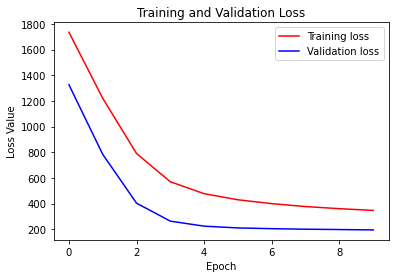

In [33]:
import matplotlib.pyplot as plt

epochs = 10
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')

plt.legend()
plt.show()

- Here we can see the **steady decrease in loss value** for both train and validation data - can run for more epochs with higher learning rate

## **Second model**
Train data : 1275 images with input shape (128, 646, 1)

Test data : 158 images with input shape (128, 646, 1)

- Slightly developed CNN model with more Convolution layers, LeakyRelu and additional nodes.


In [45]:

model2 = Sequential()

model2.add(Conv2D(1, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(128, 646, 1)))

# convolutional layer
model2.add(Conv2D(5, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

model2.add(Conv2DTranspose(25, (4,4), strides=(2,2), padding='same'))
model2.add(LeakyReLU(alpha=0.2))

model2.add(Conv2D(5, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(1,1)))

model2.add(Conv2D(5, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2DTranspose(25, (4,4), strides=(2,2), padding='same'))
model2.add(LeakyReLU(alpha=0.2))

model2.add(Conv2D(5, (4,4), strides=(2,2), padding='same'))
model2.add(LeakyReLU(alpha=0.2))

model2.add(Dropout(0.25))

model2.add(Dense(1, activation='linear'))

model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 128, 646, 1)       10        
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 128, 646, 5)       50        
_________________________________________________________________
conv2d_transpose_29 (Conv2DT (None, 256, 1292, 25)     2025      
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 256, 1292, 25)     0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 256, 1292, 5)      130       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 256, 1292, 5)      0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 256, 1292, 5)    

In [46]:
# compiling the sequential model
model2.compile(loss='mse', metrics=['mae'], optimizer='adam')

# training the model
history2 = model2.fit(y_train_expanded, y_train_expanded, epochs=10, validation_data=(x_test_expanded, y_test_expanded))


Epoch 1/10
40/40 [==============================] - 356s 9s/step - loss: 1518.7571 - mae: 31.9691 - val_loss: 179.3926 - val_mae: 9.4136
Epoch 2/10
40/40 [==============================] - 360s 9s/step - loss: 272.6899 - mae: 12.4266 - val_loss: 167.1715 - val_mae: 9.2123
Epoch 3/10
40/40 [==============================] - 361s 9s/step - loss: 201.2751 - mae: 10.4707 - val_loss: 168.3311 - val_mae: 9.3440
Epoch 4/10
40/40 [==============================] - 359s 9s/step - loss: 183.6387 - mae: 9.8204 - val_loss: 169.8376 - val_mae: 9.3744
Epoch 5/10
40/40 [==============================] - 365s 9s/step - loss: 181.4617 - mae: 9.6141 - val_loss: 171.7438 - val_mae: 9.4252
Epoch 6/10
40/40 [==============================] - 361s 9s/step - loss: 178.1789 - mae: 9.4350 - val_loss: 173.4222 - val_mae: 9.4640
Epoch 7/10
40/40 [==============================] - 357s 9s/step - loss: 176.4481 - mae: 9.3358 - val_loss: 175.0900 - val_mae: 9.5245
Epoch 8/10
40/40 [==============================] -

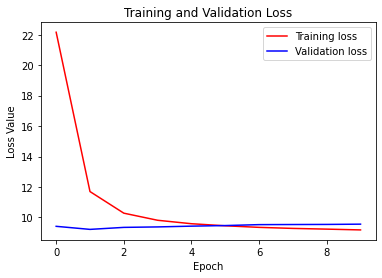

In [49]:
import matplotlib.pyplot as plt

epochs = 10
train_loss2 = history2.history['mae']
val_loss2 = history2.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss2, 'r', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

- We can see the **training and validation loss reaching its optimum at epoch five**. Training loss may continue to steadily decrease, but the model training needs to stop early at epoch five for generalization trade-off. Also the loss scores are much lower than the First Model.

## **Third model**
Train data : 1275 images with input shape (128, 646, 1)

Test data : 158 images with input shape (128, 646, 1)


- Complex CNN model with more Conv layers, MaxPooling, LeakyRelu and additional nodes.

In [ ]:

model3 = Sequential()

model3.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(400, 400, 3)))

# convolutional layer
model3.add(Conv2D(35, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(5, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2DTranspose(25, (4,4), strides=(2,2), padding='same'))
model3.add(LeakyReLU(alpha=0.2))

model3.add(Conv2DTranspose(75, (4,4), strides=(2,2), padding='same'))
model3.add(LeakyReLU(alpha=0.2))

model3.add(Conv2DTranspose(25, (4,4), strides=(2,2), padding='same'))
model3.add(LeakyReLU(alpha=0.2))
model3.add(Dropout(0.25))

# output layer
model3.add(Dense(3, activation='linear'))

model3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 400, 400, 25)      700       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 400, 400, 35)      7910      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 200, 200, 35)      0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 200, 200, 125)     39500     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 100, 100, 125)     0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 100, 100, 5)       5630      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 50, 50, 5)       

In [ ]:
# compiling the sequential model
model3.compile(loss='mse', metrics=['mae'], optimizer='adam')

# training the model
history3= model3.fit(x_train3, y_train3, epochs=10, validation_data=(x_test3, y_test3))

Epoch 1/10
25/25 [==============================] - 37s 1s/step - loss: 8883.9285 - mae: 69.7675 - val_loss: 2031.8120 - val_mae: 32.7406
Epoch 2/10
25/25 [==============================] - 36s 1s/step - loss: 2793.9058 - mae: 38.6536 - val_loss: 1926.8600 - val_mae: 32.0347
Epoch 3/10
25/25 [==============================] - 36s 1s/step - loss: 2590.3262 - mae: 36.8981 - val_loss: 2042.5693 - val_mae: 33.0566
Epoch 4/10
25/25 [==============================] - 36s 1s/step - loss: 2567.2602 - mae: 36.6846 - val_loss: 1901.7072 - val_mae: 31.9877
Epoch 5/10
25/25 [==============================] - 36s 1s/step - loss: 2442.4722 - mae: 35.8136 - val_loss: 1812.7029 - val_mae: 31.3581
Epoch 6/10
25/25 [==============================] - 36s 1s/step - loss: 2289.7017 - mae: 34.7733 - val_loss: 1833.2859 - val_mae: 31.7062
Epoch 7/10
25/25 [==============================] - 36s 1s/step - loss: 2265.1343 - mae: 34.5010 - val_loss: 1648.5397 - val_mae: 28.8727
Epoch 8/10
25/25 [================

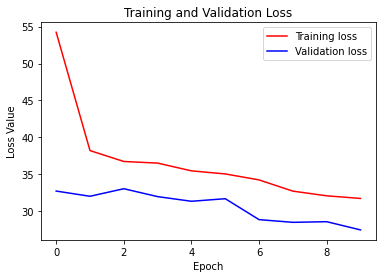

In [ ]:
import matplotlib.pyplot as plt

epochs = 10
train_loss3 = history3.history['mae']
val_loss3 = history3.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss3, 'r', label='Training loss')
plt.plot(epochs, val_loss3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')

plt.legend()
plt.show()

- Model three shows **the lowest error rate** compared to the previous models. The graph also shows possibility of improvement if more epochs are run.

## **Fourth model**
Train data : 1275 images with input shape (128, 646, 1)

Test data : 158 images with input shape (128, 646, 1)


- Complex CNN model with more Conv layers, MaxPooling, LeakyRelu and additional nodes - Same model as Model Three
- Changed **learning rate of Adam optimizer to 0.1 & 0.05**

In [ ]:
import tensorflow as tf

In [ ]:

model4 = Sequential()

model4.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(400, 400, 3)))

# convolutional layer
model4.add(Conv2D(35, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))

model4.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))

model4.add(Conv2D(5, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))

model4.add(Conv2DTranspose(25, (4,4), strides=(2,2), padding='same'))
model4.add(LeakyReLU(alpha=0.2))

model4.add(Conv2DTranspose(75, (4,4), strides=(2,2), padding='same'))
model4.add(LeakyReLU(alpha=0.2))

model4.add(Conv2DTranspose(25, (4,4), strides=(2,2), padding='same'))
model4.add(LeakyReLU(alpha=0.2))
model4.add(Dropout(0.25))

# output layer
model4.add(Dense(3, activation='linear'))

model4.summary()


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 400, 400, 25)      700       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 400, 400, 35)      7910      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 200, 200, 35)      0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 200, 200, 125)     39500     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 100, 100, 125)     0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 100, 100, 5)       5630      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 50, 50, 5)       

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model4.compile(loss='mse', metrics=['mae'], optimizer=opt)

# training the model
history4 = model4.fit(x_train3, y_train3, epochs=10, validation_data=(x_test3, y_test3))

Epoch 1/10
25/25 [==============================] - 37s 1s/step - loss: 17410294063082.2266 - mae: 1144152.8589 - val_loss: 31708.4141 - val_mae: 142.8952
Epoch 2/10
25/25 [==============================] - 35s 1s/step - loss: 52047.9129 - mae: 179.4537 - val_loss: 45263.4102 - val_mae: 168.0824
Epoch 3/10
25/25 [==============================] - 35s 1s/step - loss: 66275.7447 - mae: 203.0670 - val_loss: 45997.6641 - val_mae: 169.6146
Epoch 4/10
25/25 [==============================] - 35s 1s/step - loss: 66491.9853 - mae: 203.7541 - val_loss: 45064.7305 - val_mae: 168.1775
Epoch 5/10
25/25 [==============================] - 35s 1s/step - loss: 64855.4316 - mae: 201.3384 - val_loss: 43887.3594 - val_mae: 166.3047
Epoch 6/10
25/25 [==============================] - 35s 1s/step - loss: 63063.0273 - mae: 198.9464 - val_loss: 42617.9844 - val_mae: 164.2561
Epoch 7/10
25/25 [==============================] - 35s 1s/step - loss: 60973.1056 - mae: 195.9133 - val_loss: 41291.2305 - val_mae: 16

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model4.compile(loss='mse', metrics=['mae'], optimizer=opt)

# training the model
history4 = model4.fit(x_train3, y_train3, epochs=10, validation_data=(x_test3, y_test3))

Epoch 1/10
25/25 [==============================] - 37s 1s/step - loss: 200243869536.3535 - mae: 111238.9880 - val_loss: 15046.6230 - val_mae: 100.8412
Epoch 2/10
25/25 [==============================] - 35s 1s/step - loss: 16222.8505 - mae: 105.0229 - val_loss: 15397.8350 - val_mae: 103.0372
Epoch 3/10
25/25 [==============================] - 35s 1s/step - loss: 16526.2719 - mae: 106.3226 - val_loss: 15275.7129 - val_mae: 102.1564
Epoch 4/10
25/25 [==============================] - 35s 1s/step - loss: 16627.2723 - mae: 106.3349 - val_loss: 15090.1436 - val_mae: 100.8404
Epoch 5/10
25/25 [==============================] - 35s 1s/step - loss: 16279.4271 - mae: 104.7442 - val_loss: 14936.8906 - val_mae: 99.7527
Epoch 6/10
25/25 [==============================] - 35s 1s/step - loss: 15884.6123 - mae: 102.4978 - val_loss: 14861.7871 - val_mae: 99.2979
Epoch 7/10
25/25 [==============================] - 35s 1s/step - loss: 15652.4796 - mae: 101.1886 - val_loss: 14820.8164 - val_mae: 99.1026

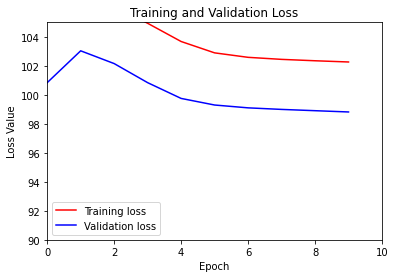

In [ ]:
import matplotlib.pyplot as plt

epochs = 10
train_loss4 = history4.history['mae']
val_loss4 = history4.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss4, 'r', label='Training loss')
plt.plot(epochs, val_loss4, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([90, 105])
plt.xlim([0, 10])
plt.legend()
plt.show()

- It looks like default adam optimizer learning rate - smaller size than 0.1 or 0.05 - worked much better than Model Four - which performed poorly here.

## **Combined Train and Validation graphs** from Previous Models

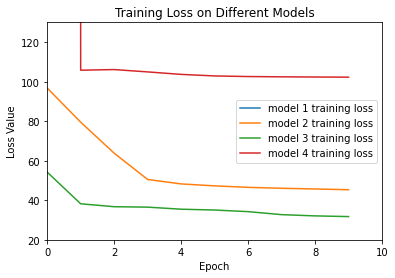

In [ ]:
import matplotlib.pyplot as plt

epochs = 10
train_loss4 = history4.history['mae']
val_loss4 = history4.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, train_loss, label='model 1 training loss')
plt.plot(epochs, train_loss2,  label='model 2 training loss')
plt.plot(epochs, train_loss3,  label='model 3 training loss')
plt.plot(epochs, train_loss4,  label='model 4 training loss')

plt.title('Training Loss on Different Models')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([20, 130])
plt.xlim([0, 10])
plt.legend()
plt.show()

- Training Loss : **Fastest convergence on Model 3** - and possibility of reaching smaller loss value if run with more epochs. Model 1 is not found in this graph since the error rate was out of bounds.

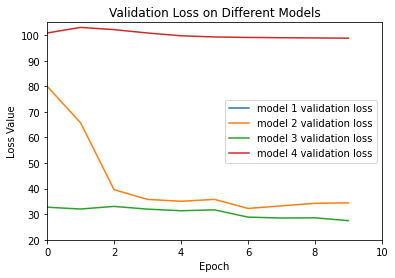

In [ ]:
import matplotlib.pyplot as plt

epochs = 10
train_loss4 = history4.history['mae']
val_loss4 = history4.history['val_mae']

epochs = range(epochs)

plt.figure()
plt.plot(epochs, val_loss, label='model 1 validation loss')
plt.plot(epochs, val_loss2,  label='model 2 validation loss')
plt.plot(epochs, val_loss3,  label='model 3 validation loss')
plt.plot(epochs, val_loss4,  label='model 4 validation loss')

plt.title('Validation Loss on Different Models')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([20, 105])
plt.xlim([0, 10])
plt.legend()
plt.show()

- Validation Loss : **Steady Decrease of loss value in Model 3** - and possibility of reaching smaller validation loss after more epochs. Model 2 already bounces off from epoch 6 and Model 4 is nowhere close to the performance of Model 3.